In [1]:
import warnings
import pathlib
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import intake
import healpy

In [2]:
tracks_path = pathlib.Path("/scratch/b/b382728/tobac_tracks/")

In [3]:
files = sorted(list(tracks_path.glob("20*/tobac_*_ICON_tracking_file.nc")))

In [4]:
len(files)

156

In [5]:
tracks = xr.open_dataset(files[0])

In [6]:
tracks

<xarray.Dataset> Size: 570MB
Dimensions:                   (feature: 1773597, cell: 177192,
                               cluster: 1637614, track: 109763)
Coordinates:
  * feature                   (feature) int64 14MB 117 297 ... 4750238 4750239
  * cell                      (cell) int64 1MB 117 297 298 ... 1328316 1328326
  * cluster                   (cluster) int64 13MB 1 2 3 ... 1637613 1637614
  * track                     (track) int64 878kB 1 3 4 ... 130620 130621 130624
Data variables: (12/32)
    frame                     (feature) int64 14MB ...
    idx                       (feature) int64 14MB ...
    y                         (feature) float64 14MB ...
    x                         (feature) float64 14MB ...
    detection_pixel_count     (feature) int64 14MB ...
    threshold_value           (feature) int64 14MB ...
    ...                        ...
    cluster_longitude         (cluster) float64 13MB ...
    cluster_latitude          (cluster) float64 13MB ...
    cluster_area              (cluster) float64 13MB ...
    cluster_max_precip        (cluster) float64 13MB ...
    cluster_total_precip      (cluster) float64 13MB ...
    is_track_mcs              (track) bool 110kB ...

In [7]:
features = []

for f in files:
    with xr.open_dataset(f) as tracks:
        features.append(np.histogram2d(
            tracks["latitude"].to_numpy(), 
            tracks["longitude"].to_numpy(), 
            bins=[np.linspace(-60,60,121), np.linspace(0,360,361)]
        )[0])

features = np.stack(features, 0)

In [8]:
features

array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 6.,  5.,  6., ..., 17.,  7.,  0.],
        [ 3.,  2.,  8., ..., 10., 13.,  8.],
        [ 1.,  6.,  7., ..., 11.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 2.,  5.,  4., ..., 17., 35., 11.],
        [ 5.,  3.,  4., ..., 17.,  6., 11.],
        [ 9.,  6., 11., ..., 23., 25., 16.]],

       [[ 2.,  2.,  2., ...,  0.,  0.,  1.],
        [ 1.,  2.,  0., ...,  3.,  3.,  1.],
        [ 3.,  3.,  0., ...,  0.,  0.,  2.],
        ...,
        [ 5., 17.,  7., ..., 27., 20.,  5.],
        [ 3.,  2., 13., ..., 18., 11.,  4.],
        [10., 24., 25., ..., 29., 21., 18.]],

       ...,

       [[ 6.,  4., 10., ..., 13., 11.,  9.],
        [ 5.,  6.,  4., ...,  3.,  0., 11.],
        [ 5.,  7.,  7., ...,  2., 12.,  6.

In [9]:
features.shape

(156, 120, 360)

([<matplotlib.axis.XTick at 0x7ffdc7f13310>,
 [Text(0, 0, '2020'),
  Text(24, 0, '2022'),
  Text(48, 0, '2024'),
  Text(72, 0, '2026'),
  Text(96, 0, '2028'),
  Text(120, 0, '2030'),
  Text(144, 0, '2032')])

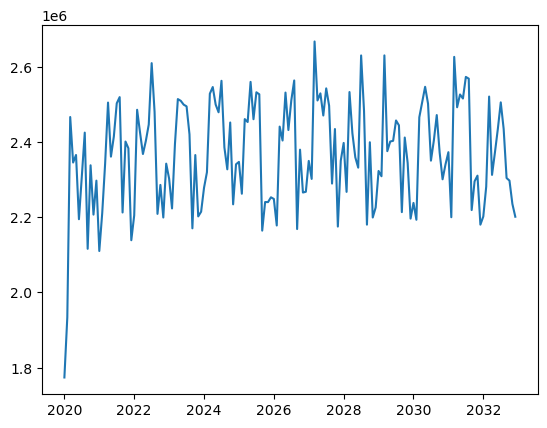

In [15]:
plt.plot(features.sum((1,2)))
plt.xticks(np.arange(0,157,24), np.arange(2020,2034,2,dtype=int))

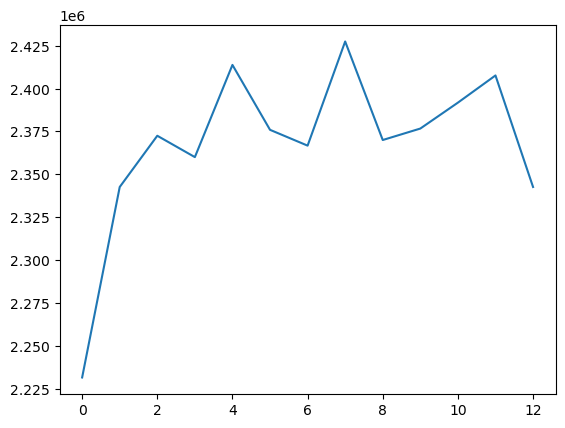

In [17]:
plt.plot(features.sum((1,2)).reshape([-1,12]).mean(1))
# plt.xticks(np.arange(0,157,24), np.arange(2020,2034,2,dtype=int))

Text(0.5, 1.0, 'Zonal DCC detections')

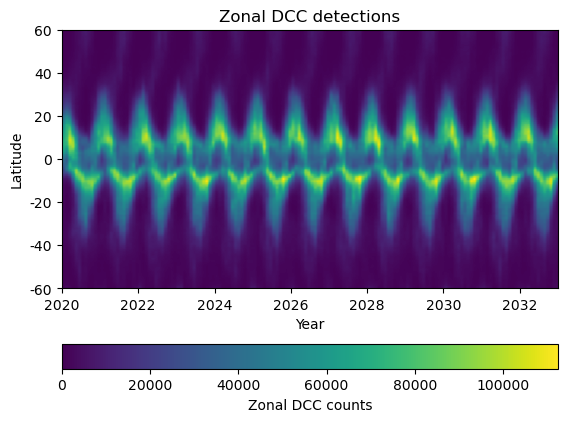

In [24]:
img = plt.imshow(features.sum(2).T,aspect="auto")
plt.xticks(np.arange(0,157,24)-0.5, np.arange(2020,2034,2,dtype=int))
plt.yticks(np.arange(0,121,20)-0.5, np.linspace(60,-60,7,dtype=int))
plt.xlabel("Year")
plt.ylabel("Latitude")
plt.colorbar(img, label="Zonal DCC counts", orientation="horizontal")
plt.title("Zonal DCC detections")

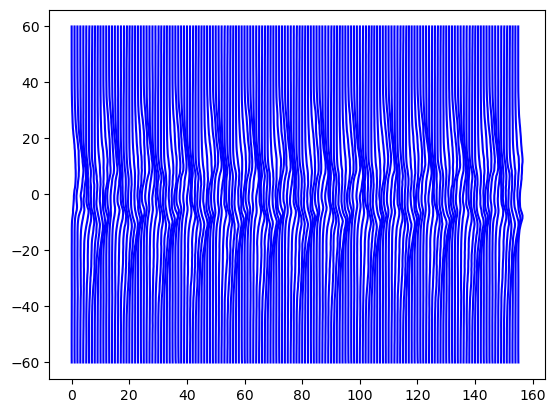

In [34]:
plt.plot(features.sum(2).T/5e4 + np.arange(0,156), np.linspace(60,-60, 120), "b-") 

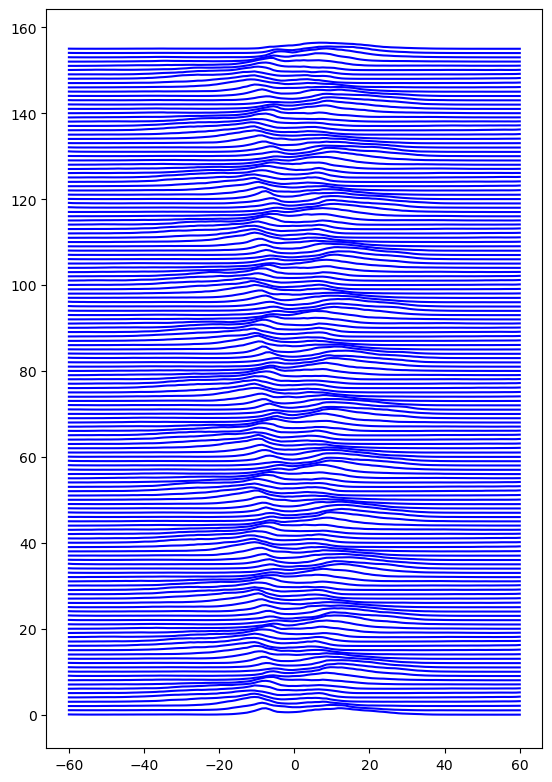

In [37]:
plt.figure(figsize=(6.4,9.6))
plt.plot(np.linspace(60,-60, 120), features.sum(2)[::-1].T/5e4 + np.arange(0,156), "b-") 

In [ ]:
features = []

for f in files:
    with xr.open_dataset(f) as tracks:
        features.append(np.histogram2d(
            tracks["latitude"].to_numpy(), 
            tracks["longitude"].to_numpy(), 
            bins=[np.linspace(-60,60,121), np.linspace(0,360,361)]
        )[0])

features = np.stack(features, 0)